In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('avocado')
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


## Exploratory Data Analysis

In [3]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
data.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte
1516,14,18-09-2016,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.00,conventional,2016,Charlotte


#### Lets drop Unnamed: 0 Column because is simmilar to the by default serial no column

In [5]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [7]:
data['type'].unique()

array(['conventional'], dtype=object)

#### Here I am dropping the type column since it is showing only one unique value 

In [8]:
data.drop(['type'],axis=1,inplace=True)

In [9]:
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,Charlotte


#### Lets check the null values without using visualization

In [10]:
data.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
year            0
region          0
dtype: int64

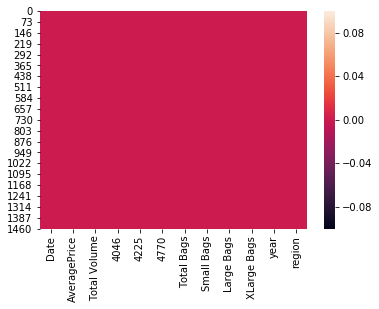

In [11]:
#Check the Null value through graph
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data.isnull())
plt.show()

In [12]:
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,Charlotte


#### Here Date Column is not useful to predict the output so dropping Date Column

In [13]:
data.drop(['Date'],axis=1,inplace=True)

In [14]:
data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,Charlotte
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,Charlotte
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,Charlotte
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,Charlotte


#### Checking the uniqueness in region column

In [15]:
data['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'Columbus', 'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids',
       'GreatLakes', 'HarrisburgScranton', 'HartfordSpringfield',
       'Houston', 'Indianapolis', 'Jacksonville', 'LasVegas',
       'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth',
       'Nashville', 'NewYork', 'Northeast', 'NorthernNewEngland',
       'Orlando', 'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains',
       'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

#### Convert the region Column to number

In [16]:
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [17]:
array = data['region']

array.shape

(1517,)

In [18]:
le=LabelEncoder()
data1=le.fit_transform(data['region'])
data1

array([0, 0, 0, ..., 7, 7, 7])

In [19]:
data['region'] = data1
data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,0
...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,7
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,7
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,7
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,7


In [20]:
data['region'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int64)

In [21]:
data = pd.DataFrame(data=data)
data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,0
...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,7
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,7
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,7
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,7


In [22]:
data.shape

(1517, 11)

In [23]:
data.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
year              int64
region            int32
dtype: object

In [24]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,21.196440
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,16.132398
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,0.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000,6.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000,19.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000,35.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,50.000000


In [25]:
dfcor = data.corr()
dfcor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683,-0.229408
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189,0.236579
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439,0.269481
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254,0.215733
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222,0.138092
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108,0.190001
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382,0.168650
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678,0.297452
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342,-0.046144
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000,-0.470472


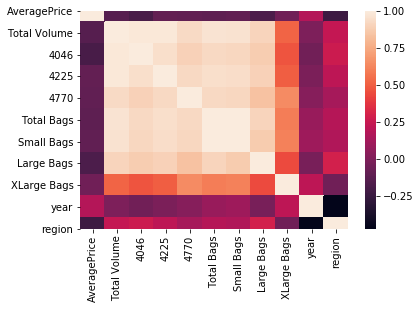

In [26]:
sns.heatmap(dfcor)

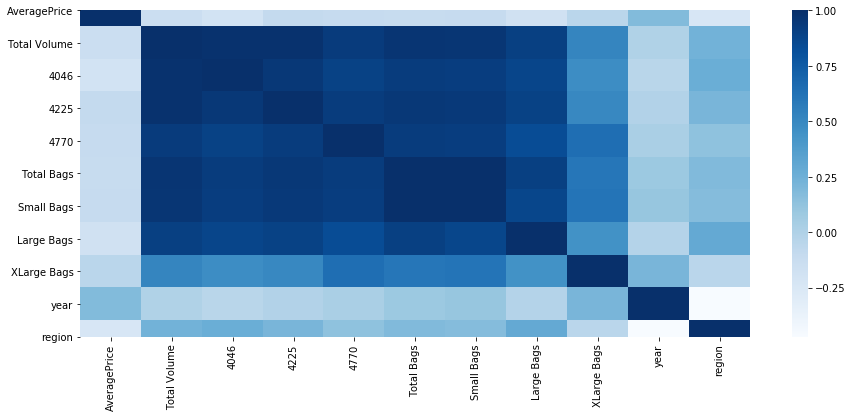

In [27]:
plt.figure(figsize=(15,6))
sns.heatmap(dfcor,cmap='Blues',annot=False)

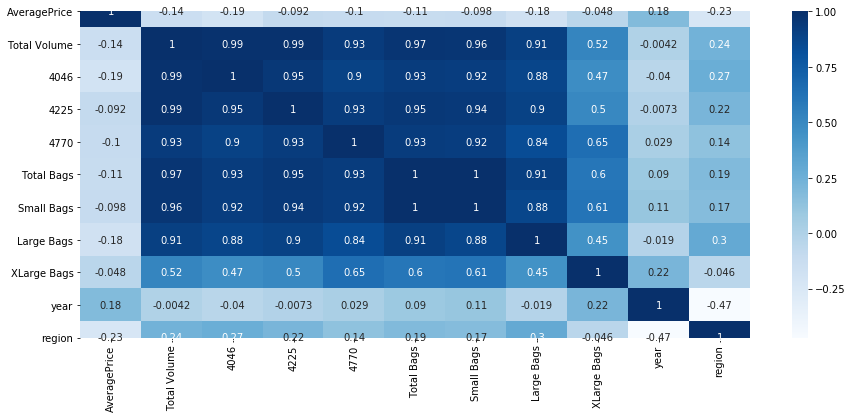

In [28]:
plt.figure(figsize=(15,6))
sns.heatmap(dfcor,cmap='Blues',annot=True)

In [29]:
#Lets check for outliers
from scipy.stats import zscore
z_score=abs(zscore(data))
print(data.shape)
data_final=data.loc[(z_score<3).all(axis=1)]
print(data_final.shape)

(1517, 11)
(1436, 11)


#### Checking Skewness and Removing it

In [30]:
#Check Skewness 
data.skew()
#there is some skewness which need to be treated,by seeing we can say only +ve skewness is significant and needs to be treated
#if value is 0.55 or more than that then there would be a skewed value

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
region          0.288146
dtype: float64

In [31]:
#Treating the skewness using log
import numpy as np
for col in data.columns:
#Here complete column name has been passed
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

In [32]:
#Lets Again Check the Skewness
data.skew()

AveragePrice   -0.109444
Total Volume    0.667468
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.695502
Small Bags      0.713843
Large Bags     -0.912766
XLarge Bags     0.783913
year            1.828332
region          0.288146
dtype: float64

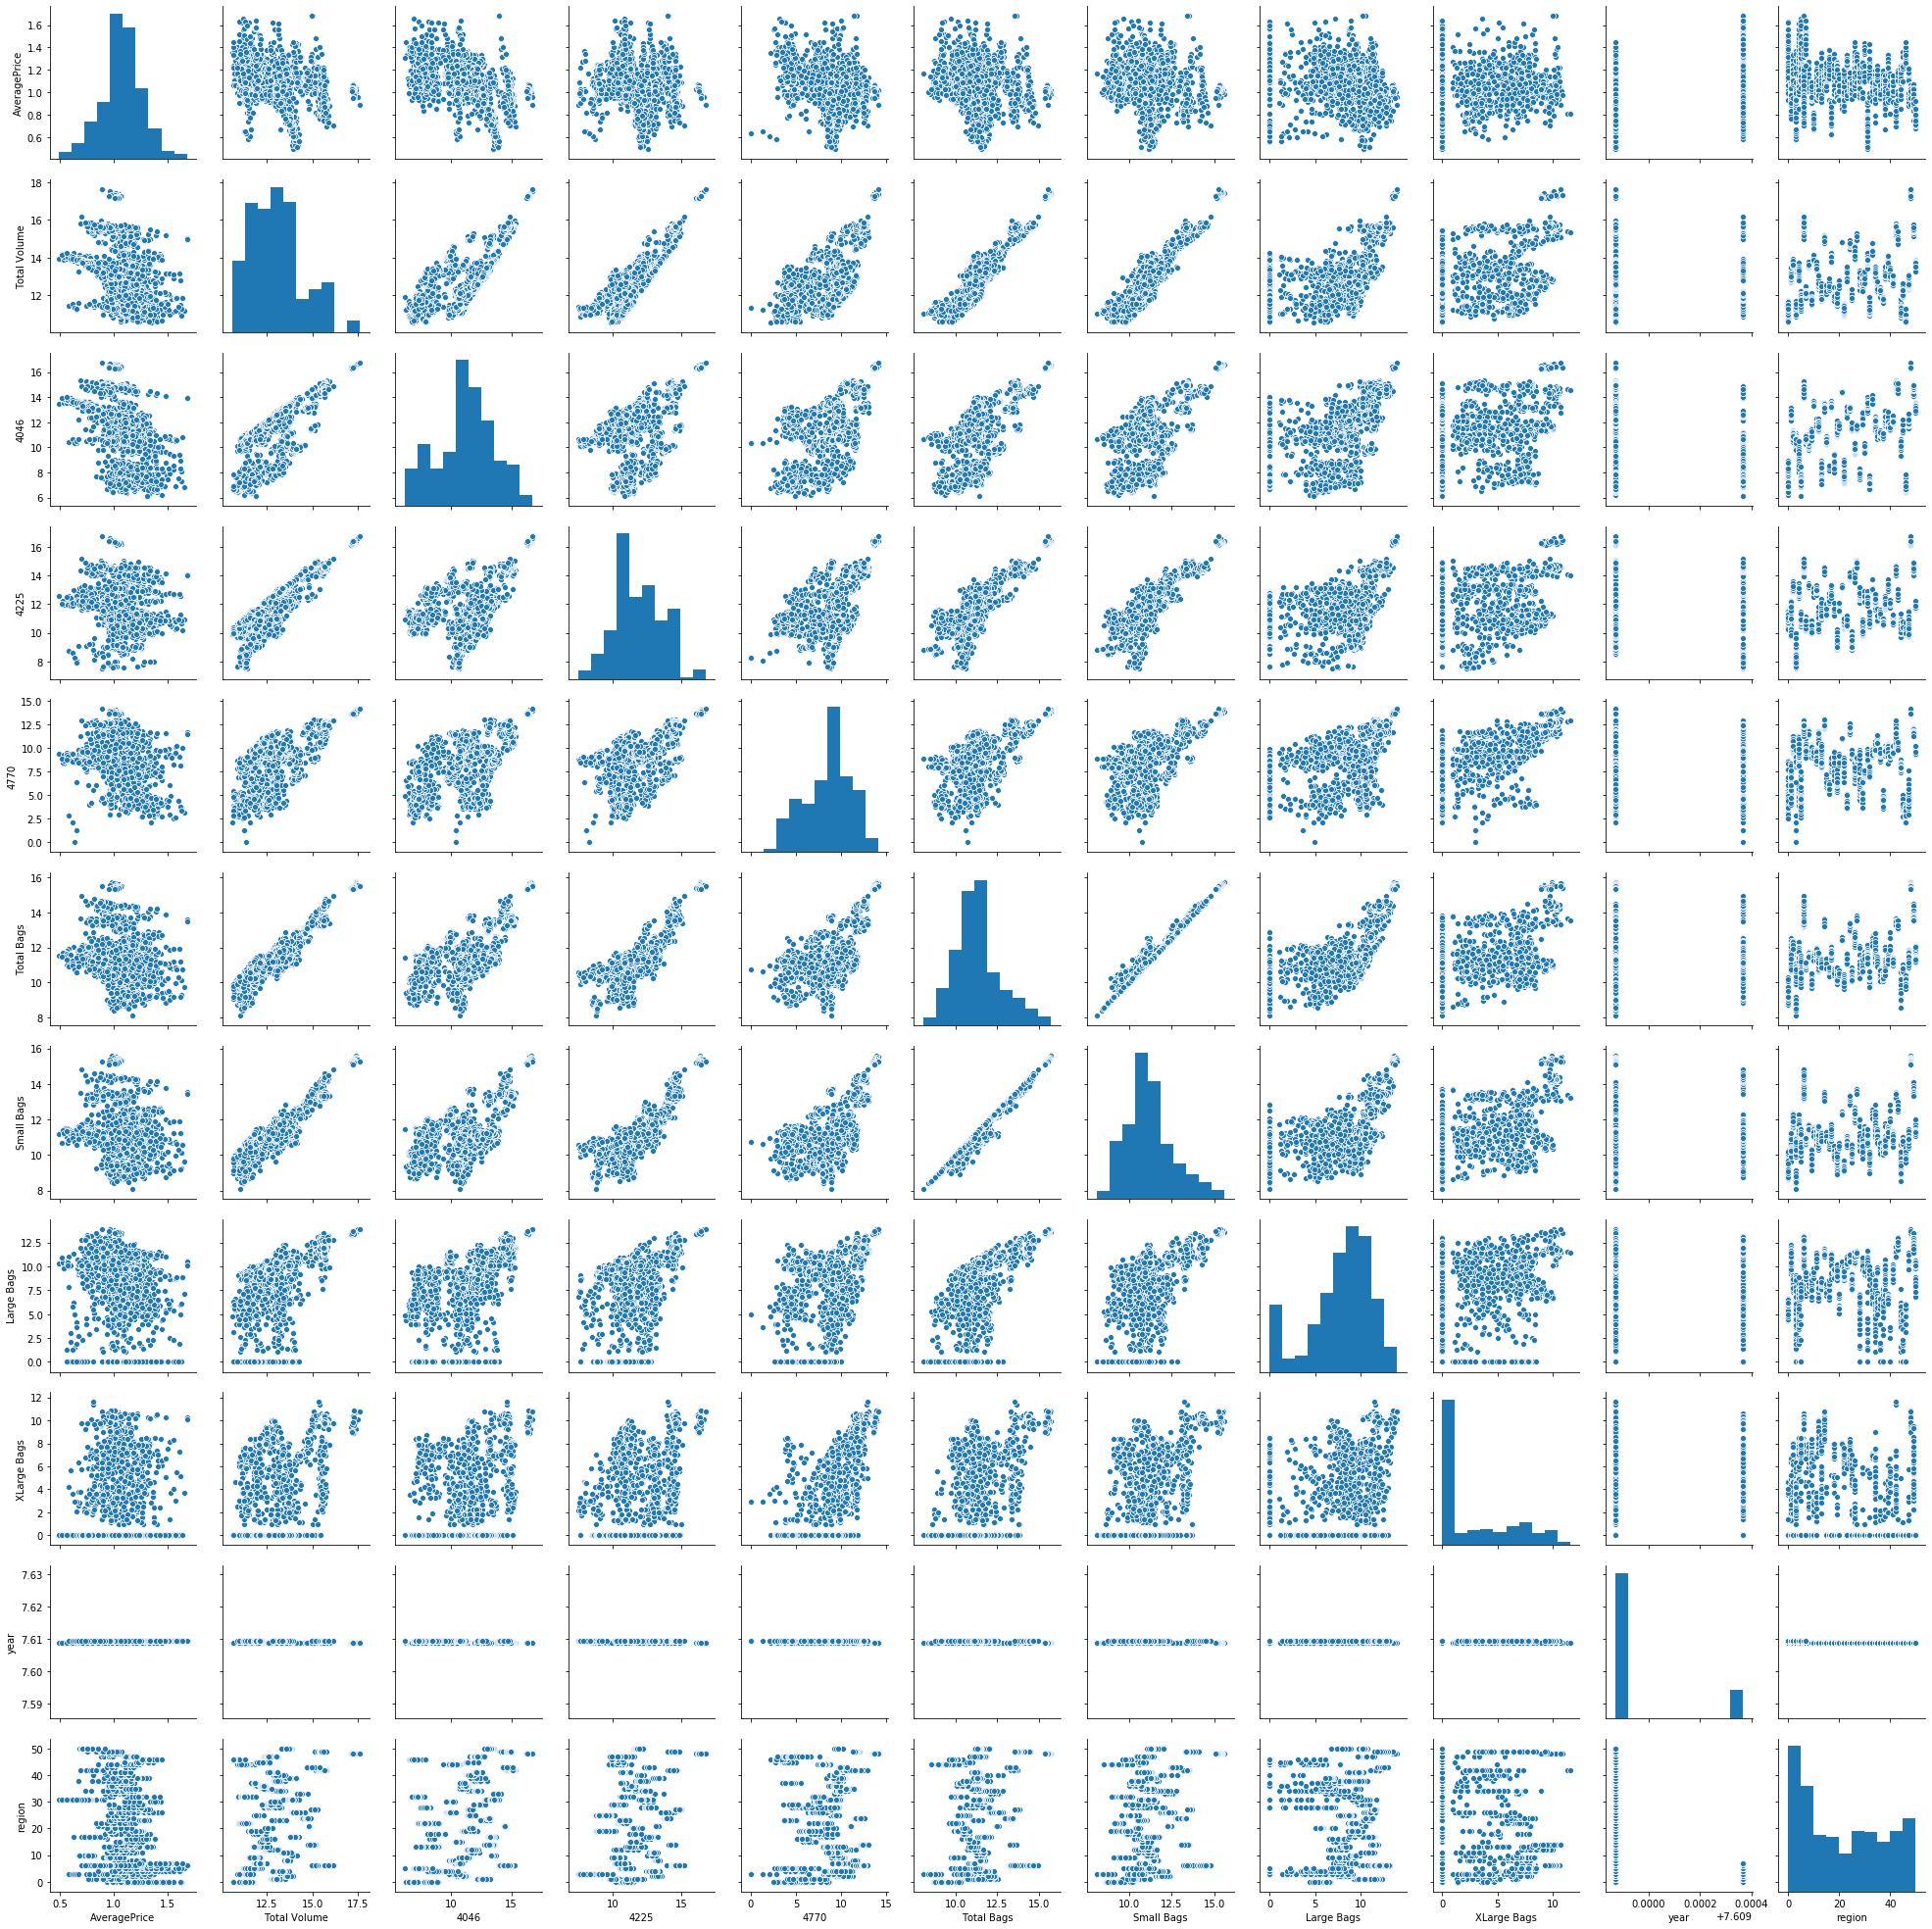

In [33]:
#Lets Check the pairplot using seaborn Library
import seaborn as sns
sns.pairplot(data)
plt.show()

#### LinePlot

In [34]:
data.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'region'],
      dtype='object')

#### Let's check how one variable changes with other 

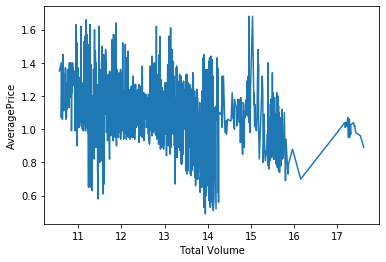

In [35]:
sns.lineplot(data["Total Volume"],data["AveragePrice"])
plt.show()

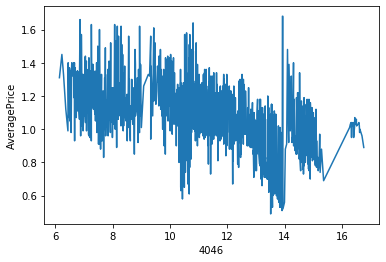

In [36]:
sns.lineplot(data["4046"],data["AveragePrice"])
plt.show()

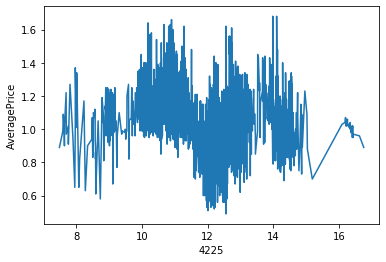

In [37]:
sns.lineplot(data["4225"],data["AveragePrice"])
plt.show()

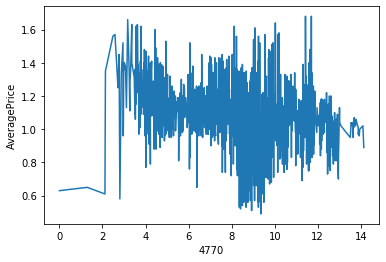

In [38]:
sns.lineplot(data["4770"],data["AveragePrice"])
plt.show()

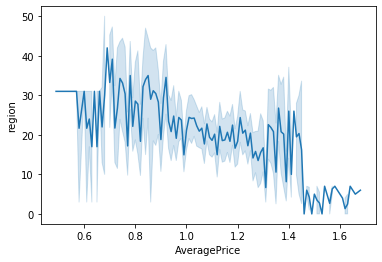

In [39]:
sns.lineplot(data["AveragePrice"],data["region"])
plt.show()

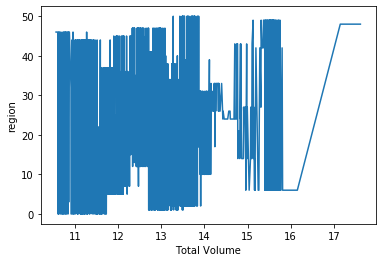

In [40]:
sns.lineplot(data["Total Volume"],data["region"])
plt.show()

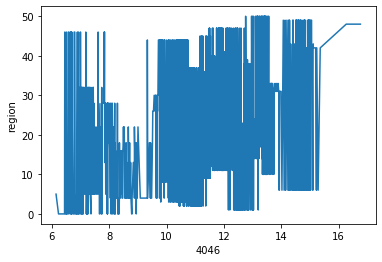

In [41]:
sns.lineplot(data["4046"],data["region"])
plt.show()

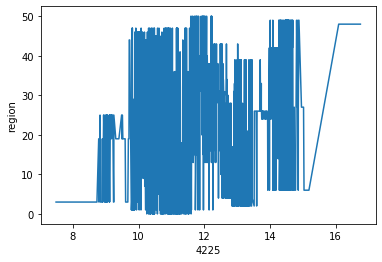

In [42]:
sns.lineplot(data["4225"],data["region"])
plt.show()

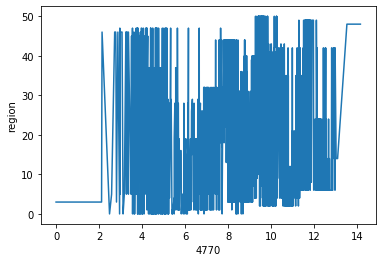

In [43]:
sns.lineplot(data["4770"],data["region"])
plt.show()

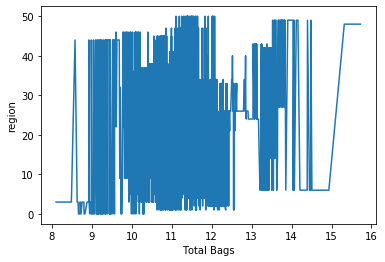

In [44]:
sns.lineplot(data["Total Bags"],data["region"])
plt.show()

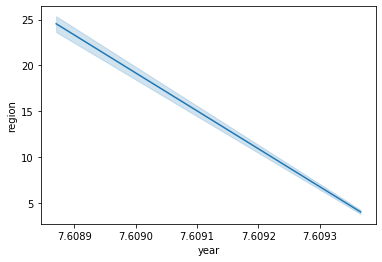

In [45]:
sns.lineplot(data["year"],data["region"])
plt.show()

#### Plotting Boxplot through Iteration

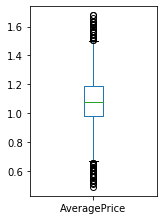

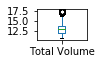

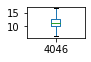

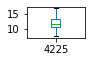

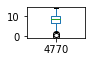

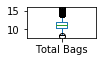

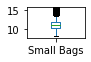

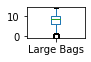

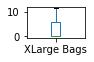

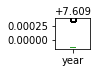

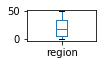

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
for i,col in enumerate(list(data.columns.values)):
    plt.subplot(5,5,i+1)
    data.boxplot(col)
    plt.grid()
    plt.tight_layout()
    plt.show()

#### Plotting Displot Through Iteration

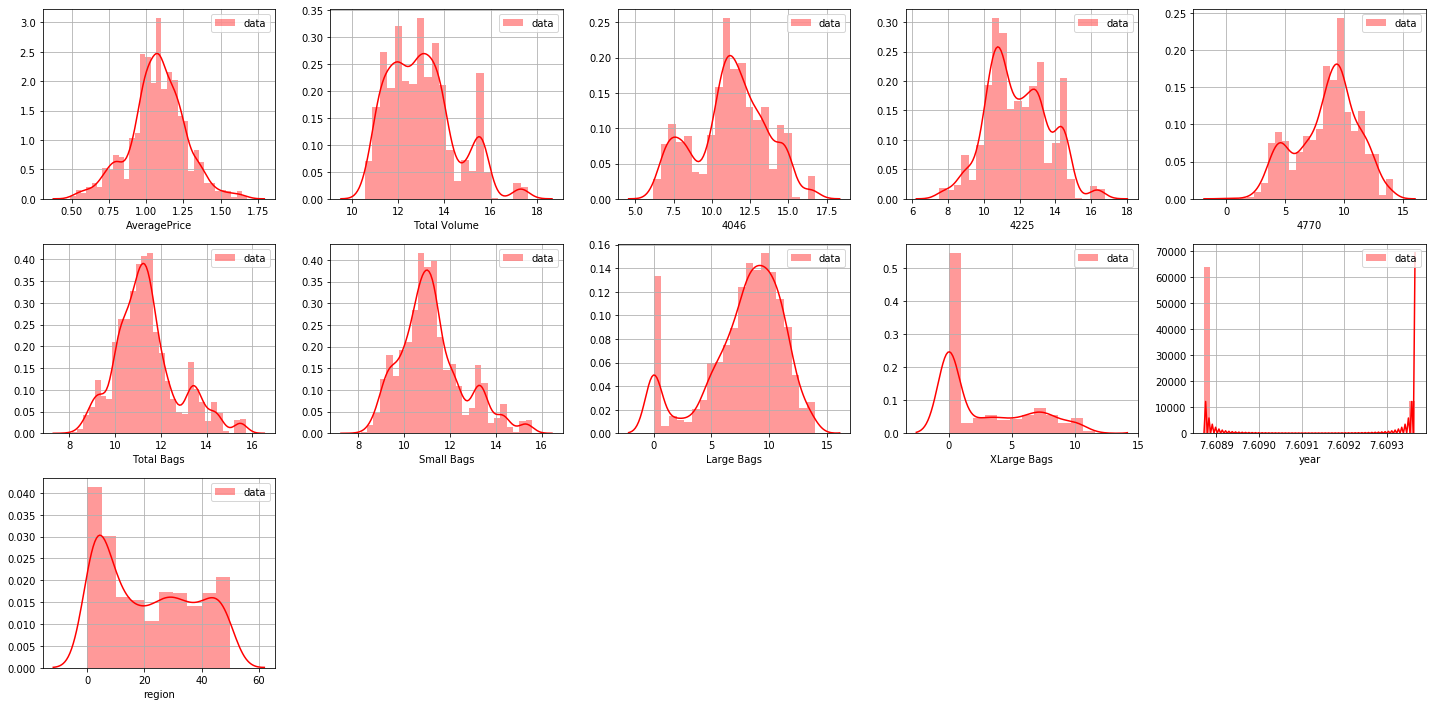

In [47]:
plt.figure(figsize=(20,16))
for i,col in enumerate(list(data.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(data[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

#### Plotting Data using Scatter Plot

In [48]:
data.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'region'],
      dtype='object')

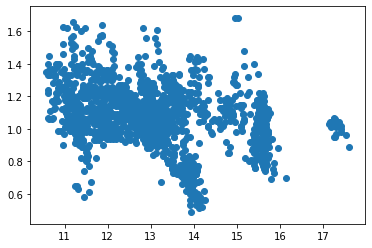

In [49]:
plt.scatter(data['Total Volume'],data['AveragePrice'])

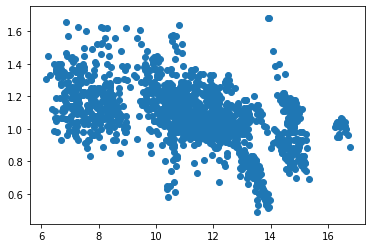

In [50]:
plt.scatter(data['4046'],data['AveragePrice'])

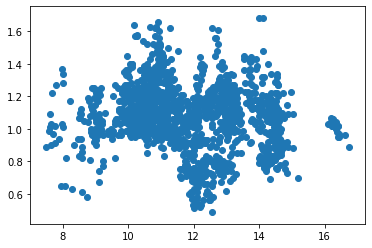

In [51]:
plt.scatter(data['4225'],data['AveragePrice'])

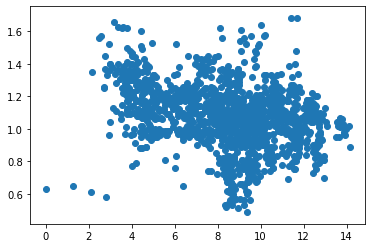

In [52]:
plt.scatter(data['4770'],data['AveragePrice'])

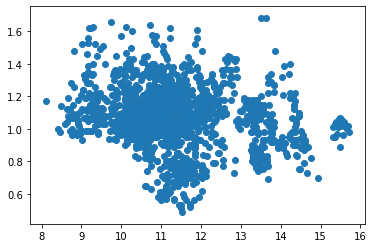

In [53]:
plt.scatter(data['Total Bags'],data['AveragePrice'])

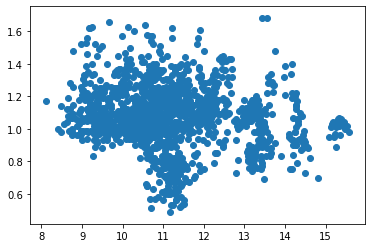

In [54]:
plt.scatter(data['Small Bags'],data['AveragePrice'])

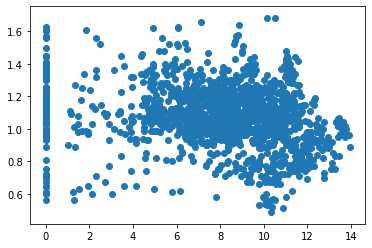

In [55]:
plt.scatter(data['Large Bags'],data['AveragePrice'])

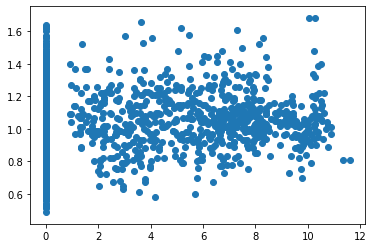

In [56]:
plt.scatter(data['XLarge Bags'],data['AveragePrice'])

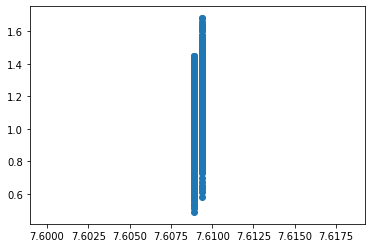

In [57]:
plt.scatter(data['year'],data['AveragePrice'])

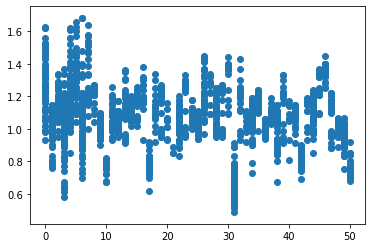

In [58]:
plt.scatter(data['region'],data['AveragePrice'])

In [59]:
data.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'region'],
      dtype='object')

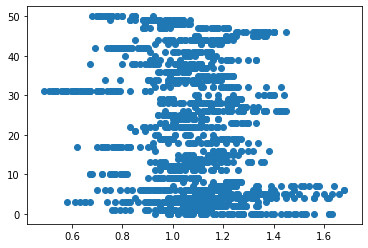

In [60]:
plt.scatter(data['AveragePrice'],data['region'])

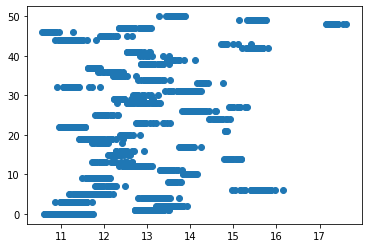

In [61]:
plt.scatter(data['Total Volume'],data['region'])

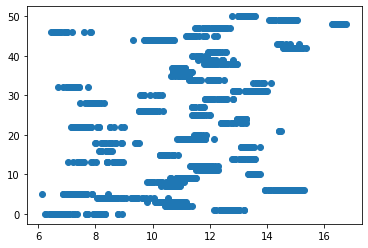

In [62]:
plt.scatter(data['4046'],data['region'])

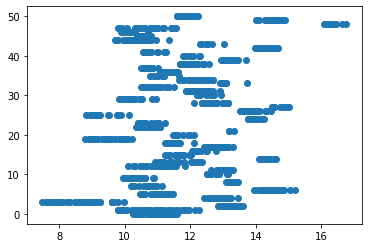

In [63]:
plt.scatter(data['4225'],data['region'])

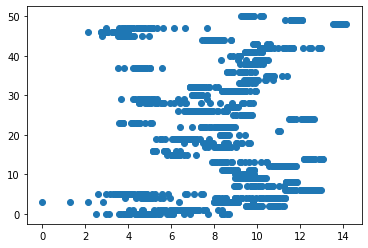

In [64]:
plt.scatter(data['4770'],data['region'])

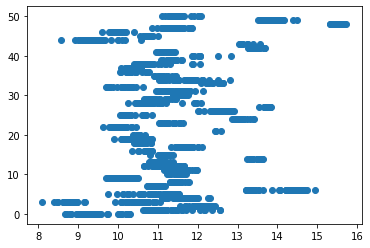

In [65]:
plt.scatter(data['Total Bags'],data['region'])

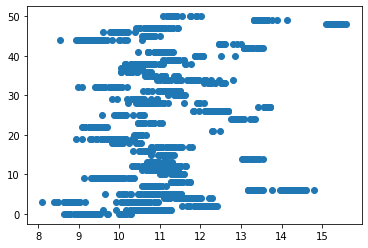

In [66]:
plt.scatter(data['Small Bags'],data['region'])

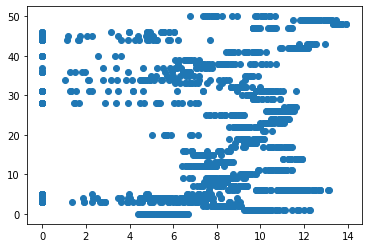

In [67]:
plt.scatter(data['Large Bags'],data['region'])

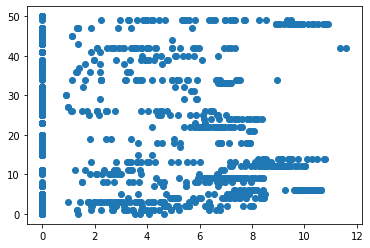

In [68]:
plt.scatter(data['XLarge Bags'],data['region'])

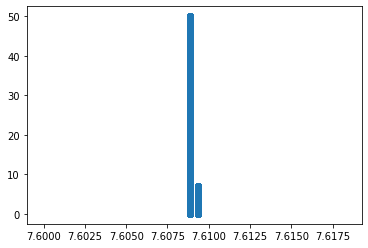

In [69]:
plt.scatter(data['year'],data['region'])

#### Column Plot

In [70]:
collist = data.columns.values
ncols=12
nrows=10

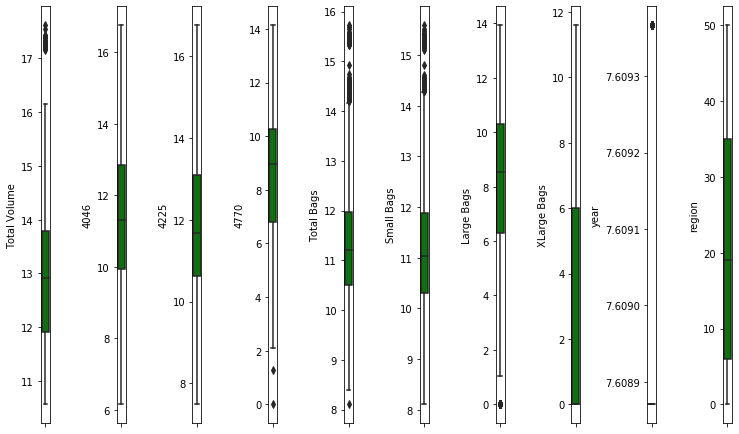

In [71]:
plt.figure(figsize=(ncols,5*ncols))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(data[collist[i]],color='green',orient='v')
    plt.tight_layout()

#### Here I am dropping year column year it is not necessary to predict the output 

In [72]:
data.drop("year", axis=1,inplace=True)

#### Separating X and Y Variable for Linear Regeression

In [73]:
data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.000000,0
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.000000,0
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.000000,0
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.000000,0
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.000000,0
...,...,...,...,...,...,...,...,...,...,...
1512,1.39,12.159227,10.960064,10.939651,9.771828,10.992377,10.795988,9.245288,5.485958,7
1513,1.51,12.090868,10.676528,10.862658,9.874088,11.055667,10.909713,9.059234,0.000000,7
1514,1.48,12.091850,10.744316,10.876052,9.725432,11.041589,10.884322,9.019078,6.716595,7
1515,1.47,12.150203,10.898807,10.889203,9.769752,11.065587,10.926918,9.021509,0.000000,7


In [74]:
X = data.drop("AveragePrice", axis=1)

In [75]:
X

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.000000,0
1,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.000000,0
2,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.000000,0
3,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.000000,0
4,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.000000,0
...,...,...,...,...,...,...,...,...,...
1512,12.159227,10.960064,10.939651,9.771828,10.992377,10.795988,9.245288,5.485958,7
1513,12.090868,10.676528,10.862658,9.874088,11.055667,10.909713,9.059234,0.000000,7
1514,12.091850,10.744316,10.876052,9.725432,11.041589,10.884322,9.019078,6.716595,7
1515,12.150203,10.898807,10.889203,9.769752,11.065587,10.926918,9.021509,0.000000,7


In [76]:
Y = data["AveragePrice"]
Y

0       1.33
1       1.35
2       0.93
3       1.08
4       1.28
        ... 
1512    1.39
1513    1.51
1514    1.48
1515    1.47
1516    1.43
Name: AveragePrice, Length: 1517, dtype: float64

In [77]:
#Scaling down using standardscaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-1.35676174, -1.82816171, -0.56752404, ..., -0.96674301,
        -0.81077519, -1.3143384 ],
       [-1.46638736, -2.01206913, -0.68423257, ..., -0.95386092,
        -0.81077519, -1.3143384 ],
       [-0.9321394 , -1.94183376, -0.15924137, ..., -0.93753117,
        -0.81077519, -1.3143384 ],
       ...,
       [-0.64565294, -0.20190426, -0.58460671, ...,  0.34275114,
         1.10389091, -0.88028586],
       [-0.60503087, -0.13577946, -0.57688492, ...,  0.34346272,
        -0.81077519, -0.88028586],
       [-0.62805557, -0.23299293, -0.5703497 , ...,  0.44343485,
        -0.81077519, -0.88028586]])

In [78]:
X.shape

(1517, 9)

In [79]:
Y.shape

(1517,)

In [80]:
Y = Y.values.reshape(-1,1)

In [81]:
Y

array([[1.33],
       [1.35],
       [0.93],
       ...,
       [1.48],
       [1.47],
       [1.43]])

In [82]:
Y.shape

(1517, 1)

#### Applying Linear Regression

In [83]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.33,random_state=39)

In [84]:
train_X.shape

(1016, 9)

In [85]:
train_Y.shape

(1016, 1)

In [86]:
lg = LinearRegression()

In [87]:
lg.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
lg.coef_

array([[-0.27427979, -0.01321682,  0.11284523, -0.03378084, -0.06350349,
         0.21058792,  0.02061676,  0.00770701, -0.0201811 ]])

In [89]:
lg.intercept_

array([1.07661275])

In [90]:
lg.score(train_X,train_Y)

0.38120108299177147

In [91]:
#predict the value
pred=lg.predict(test_X)
print("Predicted result:",pred)
print("actual ",test_Y)

Predicted result: [[1.07477673]
 [0.92017026]
 [1.30183422]
 [0.95086612]
 [0.98057352]
 [1.15000966]
 [0.93613555]
 [1.04791474]
 [1.16959817]
 [1.24876582]
 [1.1370016 ]
 [1.33234548]
 [1.30505   ]
 [1.07257684]
 [0.95071704]
 [1.01507133]
 [1.16027669]
 [0.96795045]
 [1.31910296]
 [0.99948648]
 [1.00233211]
 [0.96103632]
 [1.10244395]
 [1.15019367]
 [0.94748456]
 [1.03128386]
 [1.03571285]
 [1.01637125]
 [1.09104276]
 [1.05218102]
 [1.069056  ]
 [0.83952495]
 [1.01831081]
 [1.1946704 ]
 [0.98269625]
 [1.2797719 ]
 [1.3082614 ]
 [0.97485935]
 [0.94067193]
 [1.08376424]
 [1.20694193]
 [1.10218743]
 [1.28938537]
 [1.29643793]
 [1.12519925]
 [1.28581809]
 [1.08226564]
 [1.06176622]
 [1.17986484]
 [1.17478928]
 [0.90433636]
 [1.00387185]
 [1.07489409]
 [1.07883687]
 [0.97300581]
 [1.21051453]
 [1.18598941]
 [1.34020972]
 [1.24732437]
 [1.03005813]
 [1.11250706]
 [1.08392354]
 [0.92527398]
 [1.08631735]
 [0.96874024]
 [1.01651861]
 [1.13464849]
 [1.24548503]
 [1.20856429]
 [1.03746369]
 [

In [92]:
from sklearn.metrics import mean_squared_error, r2_score

print('error:')

print('Mean absolute error:',mean_absolute_error(test_Y,pred))
print('Mean sqaured error:',mean_squared_error(test_Y,pred))

print('Root mean squared error:',np.sqrt(mean_squared_error(test_Y,pred)))
print('R2 Score of lg: %.2f' % r2_score(test_Y, pred))

error:
Mean absolute error: 0.11511725453945683
Mean sqaured error: 0.0215343502118385
Root mean squared error: 0.1467458694881682
R2 Score of lg: 0.39


#### Lets Visualize the Goodness of the Prediction

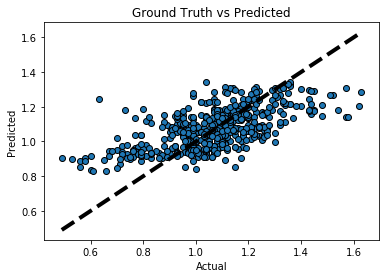

In [93]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(test_Y, pred, edgecolors=(0, 0, 0))
ax.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

#### Boost through GradientBoostRegressor By using Parameters

In [94]:
from sklearn import ensemble
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
modelgbr = ensemble.GradientBoostingRegressor(**params)

modelgbr.fit(train_X, train_Y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [95]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = modelgbr.score(train_X,train_Y)
print("model_Score:",model_score)


y_predictedgbr = modelgbr.predict(test_X)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(test_Y, y_predictedgbr))
# Explained variance score: 1 is perfect prediction
print('R2 Score: %.2f' % r2_score(test_Y, y_predictedgbr))

model_Score: 0.8563148152411032
Mean squared error: 0.01
R2 Score: 0.73


#### Lets Visualize the Goodness of the Prediction

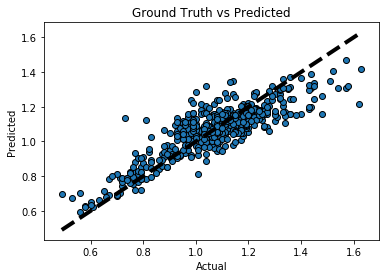

In [96]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(test_Y, y_predictedgbr, edgecolors=(0, 0, 0))
ax.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

### Linear Regression using Recursion

In [97]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,random_state=55,test_size=0.20)

In [98]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,X,Y):
    max_r_score=0
    for r_state in range(42,100):
        train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.20,random_state=r_state)
        regr.fit(train_X,train_Y)
        y_pred = regr.predict(test_X)
        r2_scr=r2_score(test_Y,y_pred)
        print("r2 score corresponding to ",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state,"is",max_r_score)
    return final_r_state

In [99]:
# Lets use LinearRegression and check the max r2 score corresponding to different state
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
r_state = maxr2_score(lreg,X,Y)

r2 score corresponding to  42 is 0.3752741240221983
r2 score corresponding to  43 is 0.42843049797178023
r2 score corresponding to  44 is 0.36093079974970155
r2 score corresponding to  45 is 0.3181843434471685
r2 score corresponding to  46 is 0.4019933288802978
r2 score corresponding to  47 is 0.3777649708496884
r2 score corresponding to  48 is 0.3730491195479593
r2 score corresponding to  49 is 0.3466186418235454
r2 score corresponding to  50 is 0.3232719717146456
r2 score corresponding to  51 is 0.38213183493335756
r2 score corresponding to  52 is 0.35377395215207597
r2 score corresponding to  53 is 0.39717026780045905
r2 score corresponding to  54 is 0.4298793507979429
r2 score corresponding to  55 is 0.4300782369655203
r2 score corresponding to  56 is 0.2333700194233831
r2 score corresponding to  57 is 0.3575504672004999
r2 score corresponding to  58 is 0.2983913513822365
r2 score corresponding to  59 is 0.39405988422906246
r2 score corresponding to  60 is 0.4228931002031773
r2 sco

### KNN Model

In [100]:
from sklearn.neighbors import KNeighborsRegressor
knr1 = KNeighborsRegressor()
knr1.fit(train_X,train_Y)
knr1.score(train_X,train_Y)
predicted=knr1.predict(test_X)
print("Mean squared error of knn: %.2f"% mean_squared_error(test_Y,predicted))
print('R2 Score of knn: %.2f' % r2_score(test_Y, predicted))

Mean squared error of knn: 0.01
R2 Score of knn: 0.77


### Lets use grid_search to find optimal value of n_neighbors for KNN Model

In [101]:
#Lets use the Grid Search to Find the Optimal Value of n_neighbors in Knn Model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import NearestNeighbors
neighbors={"n_neighbors":range(1,20)}
knr = KNeighborsRegressor()
gknr = GridSearchCV(knr,neighbors,cv=10)
gknr.fit(X,Y)
gknr.best_params_

{'n_neighbors': 19}

In [102]:
#Lets Use Knn Regression and Check max r2 score corresponding to different random states
knr = KNeighborsRegressor(n_neighbors=19)
r_state = maxr2_score(knr,X,Y)

r2 score corresponding to  42 is 0.6296802765558096
r2 score corresponding to  43 is 0.676775098573717
r2 score corresponding to  44 is 0.6419485358505037
r2 score corresponding to  45 is 0.5936009968792142
r2 score corresponding to  46 is 0.6143493531709728
r2 score corresponding to  47 is 0.6534086067994038
r2 score corresponding to  48 is 0.6197125094549234
r2 score corresponding to  49 is 0.5964682769724592
r2 score corresponding to  50 is 0.5855253018453734
r2 score corresponding to  51 is 0.6685513115291317
r2 score corresponding to  52 is 0.6578851070724827
r2 score corresponding to  53 is 0.6726359404540201
r2 score corresponding to  54 is 0.700074204247743
r2 score corresponding to  55 is 0.6297985888154125
r2 score corresponding to  56 is 0.5711244459720424
r2 score corresponding to  57 is 0.6191160633904738
r2 score corresponding to  58 is 0.5718982097728562
r2 score corresponding to  59 is 0.6570928299182077
r2 score corresponding to  60 is 0.6798615477946708
r2 score corre

In [103]:
#Lets check the mean r2 score of both linear regression model and knn regression 
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression:",cross_val_score(lreg,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for Linear Regression:",cross_val_score(lreg,X,Y,cv=5,scoring="r2").std())
print()
print("Mean r2 score for KNN Regression: ",cross_val_score(knr,X,Y,cv=5,scoring="r2").mean())
print("Stadard deviation in r2 score for KNN Regression:",cross_val_score(knr,X,Y,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression: 0.14711724477151422
Standard deviation in r2 score for Linear Regression: 0.14964048930919135

Mean r2 score for KNN Regression:  0.0092769574044979
Stadard deviation in r2 score for KNN Regression: 0.3059144150880456


### Boosting Linear Regression

In [104]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg1=AdaBoostRegressor()
add_reg1=AdaBoostRegressor(base_estimator=lreg,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg1,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg1,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.1277409998451982
Standard deviation in r2 score for ada boosting Regression:  0.30892663561340933


### Boosting KNN model

In [105]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg2=AdaBoostRegressor()
add_reg2=AdaBoostRegressor(base_estimator=knr,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg2,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg2,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.19318959098890012
Standard deviation in r2 score for ada boosting Regression:  0.2783266384539391


#### Lets check lasso regression and best value of alpha

In [106]:
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf = GridSearchCV(lsreg,parameters,cv=10)
clf.fit(X,Y)
clf.best_params_

{'alpha': 0.01}

In [107]:
#Lets use cross val score with Lasso
lasso_grs=Lasso(alpha = 0.01)
print("Mean r2 score for Lasso Regression: ",cross_val_score(lasso_grs,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for Lasso Regression: ",cross_val_score(lasso_grs,X,Y,cv=5,scoring="r2").std())

Mean r2 score for Lasso Regression:  0.17302523650732818
Standard deviation in r2 score for Lasso Regression:  0.06688672470774325


### Boosting Lasso Regressor

In [108]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg3=AdaBoostRegressor()
add_reg3=AdaBoostRegressor(base_estimator=lasso_grs,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg3,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg3,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.22437683151049476
Standard deviation in r2 score for ada boosting Regression:  0.17367738626240783


#### Support Vector Regression

In [109]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

svr1 = SVR(kernel = "linear")
svr1.fit(train_X,train_Y)
svr1.score(train_X,train_Y)
y_pred1=svr1.predict(test_X)
print("Mean squared error of linear svc: %.2f"% mean_squared_error(test_Y,y_pred1))
print('R2 Score of linear svc: %.2f' % r2_score(test_Y, y_pred1))

Mean squared error of linear svc: 0.02
R2 Score of linear svc: 0.44


#### Grid Search CV in Support Vector Regressor

In [110]:
from sklearn.svm import SVR
import numpy as np
parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
svr = SVR()
grs = GridSearchCV(svr, parameters,refit = True, verbose = 3)
grs.fit(X,Y)
grs.best_params_

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear, score=0.065, total=   0.3s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear, score=0.251, total=   0.2s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear ..................
[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear, score=0.191, total=   0.2s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf .....................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf, score=-0.002, total=   0.0s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf .....................
[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf, score=-0.013, total=   0.1s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf .....................
[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf, score=-0.001, total=   0.1s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=poly ....................
[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=poly, score=-0.004, total=   0.0s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=poly ....................
[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=poly, score=-0.012, total=   0.0s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=poly ....................
[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=poly, score=-0.002, total=   0.0s
[CV] C=1.5, epsilon=0.1, gamma=0.0001, kernel=linear .................
[CV]  C=1.5, epsilon=0.1, gamma=0.0001, kernel=linear, score=0.065, total=   0.3s
[CV] C=1.5, eps

[CV]  C=1.5, epsilon=0.3, gamma=1e-07, kernel=poly, score=-0.012, total=   0.0s
[CV] C=1.5, epsilon=0.3, gamma=1e-07, kernel=poly ....................
[CV]  C=1.5, epsilon=0.3, gamma=1e-07, kernel=poly, score=-0.073, total=   0.0s
[CV] C=1.5, epsilon=0.3, gamma=0.0001, kernel=linear .................
[CV]  C=1.5, epsilon=0.3, gamma=0.0001, kernel=linear, score=0.057, total=   0.0s
[CV] C=1.5, epsilon=0.3, gamma=0.0001, kernel=linear .................
[CV]  C=1.5, epsilon=0.3, gamma=0.0001, kernel=linear, score=0.145, total=   0.0s
[CV] C=1.5, epsilon=0.3, gamma=0.0001, kernel=linear .................
[CV]  C=1.5, epsilon=0.3, gamma=0.0001, kernel=linear, score=0.336, total=   0.0s
[CV] C=1.5, epsilon=0.3, gamma=0.0001, kernel=rbf ....................
[CV]  C=1.5, epsilon=0.3, gamma=0.0001, kernel=rbf, score=0.166, total=   0.0s
[CV] C=1.5, epsilon=0.3, gamma=0.0001, kernel=rbf ....................
[CV]  C=1.5, epsilon=0.3, gamma=0.0001, kernel=rbf, score=0.033, total=   0.0s
[CV] C=1.5

[CV]  C=10, epsilon=0.3, gamma=1e-07, kernel=linear, score=0.004, total=   0.1s
[CV] C=10, epsilon=0.3, gamma=1e-07, kernel=linear ...................
[CV]  C=10, epsilon=0.3, gamma=1e-07, kernel=linear, score=0.147, total=   0.1s
[CV] C=10, epsilon=0.3, gamma=1e-07, kernel=linear ...................
[CV]  C=10, epsilon=0.3, gamma=1e-07, kernel=linear, score=0.333, total=   0.0s
[CV] C=10, epsilon=0.3, gamma=1e-07, kernel=rbf ......................
[CV]  C=10, epsilon=0.3, gamma=1e-07, kernel=rbf, score=-0.023, total=   0.0s
[CV] C=10, epsilon=0.3, gamma=1e-07, kernel=rbf ......................
[CV]  C=10, epsilon=0.3, gamma=1e-07, kernel=rbf, score=-0.010, total=   0.0s
[CV] C=10, epsilon=0.3, gamma=1e-07, kernel=rbf ......................
[CV]  C=10, epsilon=0.3, gamma=1e-07, kernel=rbf, score=-0.071, total=   0.0s
[CV] C=10, epsilon=0.3, gamma=1e-07, kernel=poly .....................
[CV]  C=10, epsilon=0.3, gamma=1e-07, kernel=poly, score=-0.028, total=   0.0s
[CV] C=10, epsilon=0.

[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:   11.2s finished


{'C': 10, 'epsilon': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}

In [111]:
svr_grs=SVR(C=10, epsilon=0.1, gamma=0.0001, kernel='rbf')
print("Mean r2 score for ada boosting Regression: ",cross_val_score(svr_grs,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(svr_grs,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.15877169639769134
Standard deviation in r2 score for ada boosting Regression:  0.05504324169377774


#### Boosting Support Vector Machine

In [112]:
from sklearn.ensemble import AdaBoostRegressor

In [113]:
ada_reg4=AdaBoostRegressor()
add_reg4=AdaBoostRegressor(base_estimator=svr_grs,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg4,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg4,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.19933505124480078
Standard deviation in r2 score for ada boosting Regression:  0.14558989333323585


#### Decision Tree Regressor

In [114]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
  

dtregressor = DecisionTreeRegressor(random_state = 0)  
  
 
dtregressor.fit(X, Y) 

dtregressor.score(train_X,train_Y)
y_pred4=dtregressor.predict(test_X)
print("Mean squared error of Decision Tree Regressor: %.2f"% mean_squared_error(test_Y,y_pred4))
print('R2 Score : %.2f' % r2_score(test_Y, y_pred4))

Mean squared error of Decision Tree Regressor: 0.00
R2 Score : 1.00


#### Decision Tree Regressor Using GridSearchCV

In [115]:
dtm = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

dtm.fit(X,Y)
print("R-Squared on train dataset={}".format(dtm.score(test_X,test_Y)))

dtm.fit(test_X,test_Y)   
print("R-Squaredon test dataset={}".format(dtm.score(test_X,test_Y)))

R-Squared on train dataset=0.5809624838445617
R-Squaredon test dataset=0.6380817549229763


In [116]:
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }


grid_cv_dtm = GridSearchCV(dtm, param_grid, cv=5)

grid_cv_dtm.fit(X,Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=4,
                                             max_features=None,
                                             max_leaf_nodes=10,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=5,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 6, 8],
                         'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                      

In [117]:
print("R-Squared::{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))

R-Squared::0.15920550967611924
Best Hyperparameters::
{'criterion': 'mae', 'max_depth': 2, 'max_leaf_nodes': 5, 'min_samples_leaf': 40, 'min_samples_split': 10}


### Boosting Decision Tree

In [118]:
from sklearn.ensemble import AdaBoostRegressor

In [119]:
ada_reg5=AdaBoostRegressor()
add_reg5=AdaBoostRegressor(base_estimator=dtm,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(add_reg5,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(add_reg5,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.30207632477663315
Standard deviation in r2 score for ada boosting Regression:  0.16054264897912116


### Random Forest Regressor

In [120]:
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor(n_estimators=5)
rfregressor.fit(train_X, train_Y)
y_pred5 = rfregressor.predict(test_X)
print("Mean squared error of poly svc: %.2f"% mean_squared_error(test_Y,y_pred5))
print('R2 Score : %.2f' % r2_score(test_Y, y_pred5))

Mean squared error of poly svc: 0.01
R2 Score : 0.76


#### Random Forest Regressor with GridSearchCV

In [121]:
rf_gs = RandomForestRegressor(n_estimators=100)

In [122]:
n_features = X.shape[1]

In [123]:
from sklearn.model_selection import RandomizedSearchCV
grid = RandomizedSearchCV(rf_gs, n_iter=20, 
            param_distributions=dict(
                                          max_depth=np.arange(5,20+1), 
                                          max_features=np.arange(1, n_features+1)
                                    )
         )
grid.fit(X, Y)
print(grid.best_params_)

{'max_features': 8, 'max_depth': 5}


In [124]:
rf_gss = RandomForestRegressor(max_features = 2, max_depth = 9)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(rf_gss,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(rf_gss,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.11148347352299115
Standard deviation in r2 score for ada boosting Regression:  0.16867351485251458


#### Boosting RandomForestRegressor

In [125]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg6=AdaBoostRegressor()
add_reg6=AdaBoostRegressor(base_estimator=rfregressor,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(add_reg6,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(add_reg6,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.13369707492264732
Standard deviation in r2 score for ada boosting Regression:  0.3733590760594846


#### NOTE::Here I am choosing modelgbr here r2 score(0.73) and mean squared error(0.01)

In [126]:
#Lets save the above model
from sklearn.externals import joblib

#Save the model as pickle in a file
joblib.dump(modelgbr,'Avocado.pkl')

['Avocado.pkl']

#### Separating X and Y variable for classification Operation

In [127]:
data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.000000,0
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.000000,0
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.000000,0
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.000000,0
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.000000,0
...,...,...,...,...,...,...,...,...,...,...
1512,1.39,12.159227,10.960064,10.939651,9.771828,10.992377,10.795988,9.245288,5.485958,7
1513,1.51,12.090868,10.676528,10.862658,9.874088,11.055667,10.909713,9.059234,0.000000,7
1514,1.48,12.091850,10.744316,10.876052,9.725432,11.041589,10.884322,9.019078,6.716595,7
1515,1.47,12.150203,10.898807,10.889203,9.769752,11.065587,10.926918,9.021509,0.000000,7


In [128]:
X = data.drop("region", axis=1)

In [129]:
X

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.000000
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.000000
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.000000
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.000000
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.000000
...,...,...,...,...,...,...,...,...,...
1512,1.39,12.159227,10.960064,10.939651,9.771828,10.992377,10.795988,9.245288,5.485958
1513,1.51,12.090868,10.676528,10.862658,9.874088,11.055667,10.909713,9.059234,0.000000
1514,1.48,12.091850,10.744316,10.876052,9.725432,11.041589,10.884322,9.019078,6.716595
1515,1.47,12.150203,10.898807,10.889203,9.769752,11.065587,10.926918,9.021509,0.000000


In [130]:
Y = data["region"]
Y

0       0
1       0
2       0
3       0
4       0
       ..
1512    7
1513    7
1514    7
1515    7
1516    7
Name: region, Length: 1517, dtype: int32

In [131]:
X.shape

(1517, 9)

In [132]:
Y.shape

(1517,)

In [133]:
Y = Y.values.reshape(-1,1)

In [134]:
Y

array([[0],
       [0],
       [0],
       ...,
       [7],
       [7],
       [7]])

In [135]:
Y.shape

(1517, 1)

In [136]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.22,random_state=39)

In [137]:
train_X.shape

(1183, 9)

In [138]:
test_X.shape

(334, 9)

In [139]:
train_Y.shape

(1183, 1)

### Boost the Dataset by AdaBoost and GradiantBoost

In [140]:
from sklearn.ensemble import AdaBoostClassifier
modelad = AdaBoostClassifier()
modelad.fit(train_X,train_Y)
print(modelad.score(train_X,train_Y))
abpred=modelad.predict(test_X)
print(abpred)
modelad.score(test_X,test_Y)

0.12510566356720204
[24 49  4  2  2 24 49 27  4  2  2  4  4 24  2  2  2  2  4  2  2  2  2  4
  2  2  2  2  2  2  2  2 24  4  2  4  4  2  2  2  2  4  4  4  2  4  2 24
  4  2  2  2  2  2 49  2  4  4  4  2  2  4  2 49 49  2  2  4  4  2  4  2
  2  2  2 49  2  2  2 49  2  2 24  4  2  2  2  2  2  2  2  2  2  4  4  2
  2  2  2  2  4  2  2  4 49  2  2  2  2  2 49  4  2  2  2  2  4  2  2  4
  2  4  2  2  2  2  2  2  2  4 49  2 24  2  2  4  2 49  2  2  2 49  2  2
  2  2  2  2  4  2  2 24 24  2  2  2  2  2  4 49  4  2  2  2  2  2  2  2
  4  4  2  2  4  4  2  2  2 43  2 49 49  2  4  4  4  2  2  4  2  2  2  2
  2  2  2  2  4 49  2  4  2  2  2  2  2  2  2  2  4 27  2 49  2  2  4 49
  2  4  2  2  4  2 49  4  2  4 49  2 24 24 49  2  2  2  2  2  2  2  2 49
  2  4  4  2 49  2  4  2  4  4  2  2  4  2  2  2  2 49  2  2  2  2  4  2
  2 49  2  4  2 49  4  2  2  2  2  2  2 27  4  2  4 49  4  2  2  2  4 49
 49  4 49  2 49  2  2  2  2  4  2  2  2  2  4  2  2  2  2  4  2  2  2  2
  4  2  2  4 27  2  2  2  2  4 

0.11077844311377245

In [141]:
from sklearn.ensemble import GradientBoostingClassifier
modelgb=GradientBoostingClassifier()
modelgb.fit(train_X,train_Y)
print(modelgb.score(train_X,train_Y))
abpred=modelgb.predict(test_X)
print(abpred)
modelgb.score(test_X,test_Y)

1.0
[24 42 13  3 10 27 42 14 36 15  2  5  5 24 31 45 26 39 46 47 41 34  3 22
 10 19 29 47 19 29  3  1 14 22 38  0  5 33 10  7 30 32  0 46  3  0 34 14
  4  4 31 12  8 12 49  4 16  5 32 47 34 28 50  6 49  1 35 13 36 38 16  4
 26  2 19 42  1  1 31  6  2  3 24 13 35 19  3 38  3 47  2 23 11  4  0 50
 12  3  8  1  5 31 50  5  6  2 19  2 19 26  6  0  2 43  7 11  0 45 50 22
 31  0 37 36  2 47 11 44 11 28 31 34 40 38 17 32 41  6 29  7 17 42 36 11
 26 26  3  9  5 47 26 14 14 12 31  9  8 50  0  6  5  1 34 44  8 19  8 12
 20  5 19 36  4  0 26 41 19 43 41 49  6 25  0 22  0 25 17 13  3 47 35  2
 37 33  3 15 22 42 25 16 30  1  2 19 44 26 26 12  4 14 33  6 31  2 46 48
 50  5 38  2  4  9 49 13 29 32 42  8 24 14 38  3  3 35 26  1 19  2 29  6
 12  4  4 40  6 38  4 34  4 13 26 47 22 23 47 38 10  6  9 15  4 17 28 25
 44  6 47 22 23 42 22 33 47 12  8  3 12  6  5 38  0  6 36 17 31 36 22  6
 49 16 43 39  6 19  9 47 31 36  4  2 17  7 46  9  3 31  8 28 44  2 41 38
  0  1  9 22 27 12 50 36 12  0  3 13 11  2 44 4

0.8473053892215568

#### Prediction Using Naive Bayes Algo

In [142]:
mb=MultinomialNB()
mb.fit(train_X,train_Y)


predmb = mb.predict(test_X)
print(accuracy_score(test_Y,predmb))
print(confusion_matrix(test_Y,predmb))
print(classification_report(test_Y,predmb))

0.2754491017964072
[[15  0  0 ...  0  0  0]
 [ 0  2  0 ...  0  0  0]
 [ 0  0  2 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
              precision    recall  f1-score   support

           0       0.30      1.00      0.46        15
           1       0.25      0.20      0.22        10
           2       0.12      0.13      0.12        15
           3       0.73      0.47      0.57        17
           4       0.67      0.15      0.25        13
           5       0.50      0.08      0.14        12
           6       0.17      1.00      0.29        17
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00         6
          14  

### Multinomial NB by using Crossval Score

In [143]:
#Cross validation libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
mbn=MultinomialNB()

score=cross_val_score(mbn,X,Y,cv=15)
print('Score:',score)

print('Mean Scores',score.mean())
print('Standard deviation',score.std())

y_pred = cross_val_predict(mbn,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)
conf_mat = confusion_matrix(Y,y_pred)
conf_mat

Score: [0.203125   0.30081301 0.23728814 0.33043478 0.3        0.30555556
 0.27884615 0.25742574 0.21428571 0.19565217 0.27272727 0.22988506
 0.23809524 0.25609756 0.21518987]
Mean Scores 0.2556947512795886
Standard deviation 0.03994893995032206
Y Prediction values
[ 0  0  0 ...  6 38 38]


array([[62,  0,  0, ...,  0,  0,  0],
       [ 0, 12,  0, ...,  0,  1,  0],
       [ 0,  0,  6, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  5, ...,  0,  3,  1],
       [ 0,  0,  0, ...,  0,  0, 10]], dtype=int64)

### Pediction using Support Vector Machine

In [144]:
svc = SVC(kernel='rbf')
svc.fit(train_X,train_Y)
svc.score(train_X,train_Y)
predsvc=svc.predict(test_X)
print(accuracy_score(test_Y,predsvc))
print(confusion_matrix(test_Y,predsvc))
print(classification_report(test_Y,predsvc))

0.9221556886227545
[[15  0  0 ...  0  0  0]
 [ 0  9  0 ...  0  0  0]
 [ 0  0 15 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  4  0]
 [ 0  0  0 ...  0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      0.90      0.86        10
           2       0.88      1.00      0.94        15
           3       1.00      1.00      1.00        17
           4       0.93      1.00      0.96        13
           5       1.00      1.00      1.00        12
           6       0.94      1.00      0.97        17
           7       0.71      1.00      0.83         5
           8       1.00      1.00      1.00         8
           9       1.00      0.89      0.94         9
          10       0.80      1.00      0.89         4
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00        13
          13       1.00      1.00      1.00         6
          14  

### Support Vector Machine by using Crossval Score

In [145]:
sv = SVC()

score=cross_val_score(sv,X,Y,cv=5,scoring='accuracy')
print('accuracy Score=',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(sv,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

from sklearn.metrics import accuracy_score
accuracy_score(Y,y_pred)

accuracy Score= [0.81790123 0.9044586  0.9009901  0.88474576 0.86120996]
Mean Scores 0.8738611318857185
Standard Deviation 0.03188172883876846
Y Prediction values
[0 0 0 ... 9 7 7]


0.8734344100197758

### Use GridSearchCV for Support Vector Machine

In [146]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
gridsv = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
gridsv.fit(train_X, train_Y)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.115, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.107, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.142, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.521, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.517, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.499, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.279, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.285, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.291, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.093, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.837, total=   0.2s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.837, total=   0.3s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.951, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.929, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.913, total=   0.1s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.966, total=   0.1s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.934, total=   0.1s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    8.1s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [147]:
# inspection the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(gridsv.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(gridsv.best_estimator_)

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [148]:
# Re-run predictions and see classification report 

grid_predictions = gridsv.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.90      0.90      0.90        10
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        17
           4       0.93      1.00      0.96        13
           5       1.00      1.00      1.00        12
           6       0.94      1.00      0.97        17
           7       1.00      0.80      0.89         5
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00        13
          13       1.00      1.00      1.00         6
          14       1.00      0.88      0.93         8
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         2
          17       0.86    

#### Boosting through Support Vector Classifier

In [149]:
#from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier

svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1,algorithm='SAMME.R')

#abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1,algorithm='SAMME')

# Train Adaboost Classifer
modelsvboost = abc.fit(train_X,train_Y)

#Predict the response for test dataset
y_pred = modelsvboost.predict(test_X)


print("Accuracy:",metrics.accuracy_score(test_Y, y_pred))

Accuracy: 0.3323353293413174


### Prediction Using DecisionTreeClassifier

In [150]:
dtc=DecisionTreeClassifier()
dtc.fit(train_X,train_Y)
dtc.score(train_X,train_Y)
preddtc=dtc.predict(test_X)
print(accuracy_score(test_Y,preddtc))
print(confusion_matrix(test_Y,preddtc))
print(classification_report(test_Y,preddtc))

0.8622754491017964
[[14  0  0 ...  0  0  0]
 [ 0  8  0 ...  0  0  0]
 [ 0  0 14 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  5  0]
 [ 0  0  0 ...  0  0  4]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.89      0.80      0.84        10
           2       0.88      0.93      0.90        15
           3       1.00      1.00      1.00        17
           4       0.92      0.92      0.92        13
           5       0.92      1.00      0.96        12
           6       0.94      0.88      0.91        17
           7       0.75      0.60      0.67         5
           8       1.00      1.00      1.00         8
           9       1.00      0.78      0.88         9
          10       0.50      0.75      0.60         4
          11       0.83      1.00      0.91         5
          12       1.00      1.00      1.00        13
          13       1.00      1.00      1.00         6
          14  

### DecisionTreeClassifier by using Crossval Score

In [151]:
dt=DecisionTreeClassifier(criterion='gini')
score=cross_val_score(dt,X,Y,cv=5,scoring='f1_macro')

print('F1-score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(dt,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

F1-score: [0.66788405 0.81470239 0.80488424 0.79539756 0.69523644]
Mean Scores 0.7556209358095428
Standard Deviation 0.061390096161871924
Y Prediction values
[ 0  0  0 ... 35 35 35]


array([[58,  0,  0, ...,  0,  0,  0],
       [ 0, 32,  0, ...,  0,  0,  0],
       [ 0,  0, 55, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 25,  0,  0],
       [ 0,  0,  0, ...,  2, 25,  0],
       [ 0,  0,  0, ...,  0,  0, 23]], dtype=int64)

#### Using GridSearchCV for DecisionTreeClassifier

In [152]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
dt_grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
dt_grid_search_cv.fit(train_X, train_Y)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:   11.5s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16

In [153]:
# inspection the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(dt_grid_search_cv.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(dt_grid_search_cv.best_estimator_)

{'max_leaf_nodes': 99, 'min_samples_split': 2}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=99,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')


In [154]:
# Re-run predictions and see classification report 

grid_predictions = dt_grid_search_cv.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       1.00      0.90      0.95        10
           2       0.88      0.93      0.90        15
           3       1.00      1.00      1.00        17
           4       0.92      0.92      0.92        13
           5       0.92      1.00      0.96        12
           6       0.94      0.88      0.91        17
           7       0.75      0.60      0.67         5
           8       1.00      1.00      1.00         8
           9       1.00      0.78      0.88         9
          10       0.43      0.75      0.55         4
          11       0.71      1.00      0.83         5
          12       1.00      1.00      1.00        13
          13       0.86      1.00      0.92         6
          14       1.00      0.62      0.77         8
          15       1.00      1.00      1.00         3
          16       0.50      0.50      0.50         2
          17       0.71    

### Boost Decision Tree Classifier

In [155]:
from sklearn.ensemble import AdaBoostClassifier

dtbclassifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
dtbclassifier.fit(train_X, train_Y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [156]:
predictions = dtbclassifier.predict(test_X)
predictions

array([24, 43,  0,  2,  2, 24, 43, 27,  0,  2,  2,  0,  0, 24,  2,  2,  2,
        2,  0,  2,  2,  2,  2,  0,  2,  2,  2,  2,  2,  2,  2,  2, 24,  0,
        2,  0,  0,  2,  2,  2,  2,  0,  0,  0,  2,  0,  2, 24,  0,  2,  2,
        2,  2,  2, 49,  2,  0,  0,  0,  2,  2,  0,  2, 43, 43,  2,  2,  0,
        0,  2,  0,  2,  2,  2,  2, 43,  2,  2,  2, 43,  2,  2, 24,  0,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  0,  0,  2,  2,  2,  2,  2,  0,  2,
        2,  0, 43,  2,  2,  2,  2,  2, 43,  0,  2,  2,  2,  2,  0,  2,  2,
        0,  2,  0,  2,  2,  2,  2,  2,  2,  2,  0, 43,  2, 24,  2,  2,  0,
        2, 43,  2,  2,  2, 43,  2,  2,  2,  2,  2,  2,  0,  2,  2, 24, 24,
        2,  2,  2,  2,  2,  0, 43,  0,  2,  2,  2,  2,  2,  2,  2,  0,  0,
        2,  2,  0,  0,  2,  2,  2, 43,  2, 43, 43,  2,  0,  0,  0,  2,  2,
        0,  2,  2,  2,  2,  2,  2,  2,  2,  0, 43,  2,  0,  2,  2,  2,  2,
        2,  2,  2,  2,  0, 27,  2, 43,  2,  2,  0, 49,  2,  0,  2,  2,  0,
        2, 43,  0,  2,  0

In [157]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y,predictions))

0.11377245508982035


In [158]:
confusion_matrix(test_Y, predictions)

array([[15,  0,  0, ...,  0,  0,  0],
       [ 0,  0, 10, ...,  0,  0,  0],
       [ 0,  0, 15, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  1,  0],
       [ 0,  0,  0, ...,  0,  2,  0],
       [ 0,  0,  6, ...,  0,  0,  0]], dtype=int64)

### Prediction Using KNN Nearest Neighbor

In [159]:
#k = 10
knn = KNeighborsClassifier()
knn.fit(train_X,train_Y)
knn.score(train_X,train_Y)
predknn=knn.predict(test_X)
print(accuracy_score(test_Y,predknn))
print(confusion_matrix(test_Y,predknn))
print(classification_report(test_Y,predknn))

0.8952095808383234
[[15  0  0 ...  0  0  0]
 [ 0  9  0 ...  0  0  0]
 [ 0  0 15 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  4  0]
 [ 0  0  0 ...  0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.90      0.90      0.90        10
           2       0.83      1.00      0.91        15
           3       1.00      0.94      0.97        17
           4       0.91      0.77      0.83        13
           5       1.00      0.92      0.96        12
           6       0.89      1.00      0.94        17
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         9
          10       0.67      1.00      0.80         4
          11       1.00      0.80      0.89         5
          12       1.00      1.00      1.00        13
          13       0.67      1.00      0.80         6
          14  

### KNN Nearest Neighbor by using Crossval Score 

In [160]:
# k=10

kn=KNeighborsClassifier()

score=cross_val_score(kn,X,Y,cv=10,scoring='accuracy')

print('Accuracy score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(kn,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

print("y_pred.shape",y_pred.shape)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

Accuracy score: [0.78285714 0.87058824 0.88484848 0.88125    0.8961039  0.93288591
 0.90277778 0.88405797 0.86666667 0.8976378 ]
Mean Scores 0.8799673875878439
Standard Deviation 0.03691990532899978
Y Prediction values
[0 0 0 ... 9 7 7]
y_pred.shape (1517,)


array([[62,  0,  0, ...,  0,  0,  0],
       [ 0, 44,  0, ...,  0,  0,  0],
       [ 0,  0, 60, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 25,  0,  0],
       [ 0,  0,  0, ...,  0, 28,  0],
       [ 0,  0,  0, ...,  0,  0, 26]], dtype=int64)

### Use GridSearchCV for KNN Nearest Neighbor

In [161]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [162]:
# search for an optimal value of K for KNN

# list of integers 1 to 30
# integers we want to try
k_range = range(1, 31)

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn1 = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn1, train_X, train_Y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.9297453946201649, 0.909015280052644, 0.9031768806325345, 0.9022994726875428, 0.8885190926105138, 0.8784712748969445, 0.8749805992300121, 0.8590153541598138, 0.8586159224713915, 0.8590465344933094, 0.8473475090851027, 0.8402463989549517, 0.8370230932422853, 0.8308596610764021, 0.8231021653204064, 0.8090415326560476, 0.798257958802419, 0.7815696808346423, 0.7754767134343619, 0.7649322701538435, 0.7522259090732331, 0.7423797893138223, 0.7334393294685569, 0.7277726323294077, 0.7261522912755999, 0.7147975029393262, 0.7108975100653313, 0.7028100078574122, 0.698461574516203, 0.6891104307949759]


In [163]:
# define the parameter values that should be searched
# for python 2, k_range = range(1, 31)
knn1 = KNeighborsClassifier(n_neighbors=k)
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [164]:
# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [165]:
# instantiate the grid
gridknn = GridSearchCV(knn1, param_grid, cv=10, scoring='accuracy')

In [166]:
# fit the grid with data
gridknn.fit(train_X, train_Y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=30, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [167]:
# inspection the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(gridknn.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(gridknn.best_estimator_)

{'n_neighbors': 1}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


In [168]:
# Re-run predictions and see classification report 

grid_predictions = gridknn.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.90      0.95        10
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        17
           4       0.92      0.92      0.92        13
           5       1.00      1.00      1.00        12
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         8
           9       1.00      0.89      0.94         9
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00        13
          13       0.86      1.00      0.92         6
          14       1.00      0.88      0.93         8
          15       1.00      1.00      1.00         3
          16       0.67      1.00      0.80         2
          17       0.86    

#### Bagging of KNN Nearest Neighbor 

In [169]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
baggingknn = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

In [170]:
baggingknn.fit(train_X, train_Y)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=0.5,
                  max_samples=0.5, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [172]:
predictions = baggingknn.predict(test_X)
predictions

array([24, 42,  5,  3, 10, 27, 42, 14, 16, 15,  2,  5,  5, 24, 31, 41, 26,
       39, 46, 19, 41, 33,  3, 22, 10, 19, 19, 29, 19, 29,  3,  1, 14, 22,
       41,  0,  5, 33, 10, 35, 30, 32,  0, 46,  3,  0, 34, 14,  4, 26, 31,
       12,  8, 12, 49,  4, 16,  5, 32, 23, 34, 28, 50,  6, 49,  1,  7, 13,
       18, 38,  4, 30, 26,  2, 19, 42,  1,  1, 31,  6,  2,  3, 24, 16, 35,
       19,  3, 50,  3,  1,  2, 23, 11,  4,  0, 50, 12,  3,  8,  1,  5, 31,
       50,  5,  6,  2, 19,  2, 19, 26,  6,  0,  2,  1,  7, 11,  0, 45, 50,
       22, 31,  0, 37, 36,  2,  1, 11, 44, 11,  4, 42, 34, 40, 39, 17, 32,
       41,  6, 29,  7, 17, 42,  9, 11, 26, 26,  3,  9,  5,  1, 26, 14, 24,
       12, 31,  9,  8, 17,  0,  6,  5,  1, 34, 44,  8, 19,  8, 12, 16,  5,
       19,  9,  4, 32, 26, 41, 19, 43, 12, 49,  6, 25,  0, 22,  0, 25, 17,
       13,  3, 47, 35,  2, 37, 33,  3, 15, 22, 42,  3,  5, 30,  1,  2, 19,
       44, 26, 26, 12,  4, 14, 33,  6, 31,  2, 46, 48, 50, 28, 38,  2,  4,
        9, 49, 13, 29, 22

In [173]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y,predictions))

0.937125748502994


In [174]:
confusion_matrix(test_Y, predictions)

array([[15,  0,  0, ...,  0,  0,  0],
       [ 0, 10,  0, ...,  0,  0,  0],
       [ 0,  0, 15, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  1,  0,  0],
       [ 0,  0,  0, ...,  0,  6,  0],
       [ 0,  0,  0, ...,  0,  0,  6]], dtype=int64)

### Prediction Using RandomForest Classification

In [175]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_X,train_Y)
rf.score(train_X,train_Y)
predf=rf.predict(test_X)
print(accuracy_score(test_Y,predf))
print(confusion_matrix(test_Y,predf))
print(classification_report(test_Y,predf))

0.9401197604790419
[[15  0  0 ...  0  0  0]
 [ 0  9  0 ...  0  0  0]
 [ 0  0 15 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  6  0]
 [ 0  0  0 ...  0  0  5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.90      0.90      0.90        10
           2       1.00      1.00      1.00        15
           3       0.94      1.00      0.97        17
           4       0.92      0.92      0.92        13
           5       1.00      0.92      0.96        12
           6       1.00      1.00      1.00        17
           7       1.00      0.60      0.75         5
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         9
          10       0.57      1.00      0.73         4
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00        13
          13       1.00      1.00      1.00         6
          14  

### RandomForestClassifier Using Cross_Val_Score

In [176]:
# k=10

rf1=RandomForestClassifier()

score=cross_val_score(rf1,X,Y,cv=10,scoring='accuracy')

print('Accuracy score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(rf1,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

print("y_pred.shape",y_pred.shape)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

Accuracy score: [0.85142857 0.93529412 0.89090909 0.9375     0.92857143 0.96644295
 0.96527778 0.89855072 0.8962963  0.92913386]
Mean Scores 0.9199404818555756
Standard Deviation 0.033873743816922
Y Prediction values
[ 0  0  0 ...  7 35  7]
y_pred.shape (1517,)


array([[63,  0,  0, ...,  0,  0,  0],
       [ 0, 42,  0, ...,  0,  0,  1],
       [ 0,  0, 60, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 25,  0,  0],
       [ 0,  0,  0, ...,  0, 30,  0],
       [ 0,  0,  0, ...,  0,  0, 22]], dtype=int64)

### Using GridSearchCV for Random Forest Classifier

In [177]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf2 = RandomForestClassifier()
# Instantiate the grid search model
grid_search_rf2 = GridSearchCV(estimator = rf2, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search_rf2.fit(train_X,train_Y)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  7.6min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [178]:
# inspection the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(grid_search_rf2.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_search_rf2.best_estimator_)

{'bootstrap': True, 'max_depth': 80, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=80, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [179]:
# Re-run predictions and see classification report 

predictions = (grid_search_rf2.predict(test_X))
  
# print classification report 
print(classification_report(test_Y, predictions)) 

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.90      0.90      0.90        10
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        17
           4       0.92      0.92      0.92        13
           5       0.92      0.92      0.92        12
           6       1.00      1.00      1.00        17
           7       1.00      0.60      0.75         5
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00        13
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00         3
          16       0.67      1.00      0.80         2
          17       0.86    

#### Bagging of Random Forest Classifier 

In [180]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
baggingrf = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

In [181]:
baggingrf.fit(train_X, train_Y)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=0.5,
                  max_samples=0.5, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [182]:
predictionsrf = baggingrf.predict(test_X)
predictionsrf

array([24, 42,  5,  3, 10, 27, 42, 14, 28, 15,  2,  5,  5, 24, 31, 45, 26,
       39, 46, 19, 41, 33,  3, 22, 10, 19, 19, 29, 19, 29,  3,  1, 14, 22,
       41,  0,  5, 33, 10, 35, 30, 32,  0, 46,  3,  0, 34, 14,  4, 26, 31,
       12,  8, 12, 49,  4, 16,  5, 32, 23, 34, 28, 50,  6, 49,  1,  7, 13,
       18, 38,  4, 30, 26,  2, 19, 49,  1,  1, 31,  6,  2,  3, 24, 16, 35,
       19,  3, 50,  3, 47,  2, 23, 11,  4,  0, 50, 12,  3,  8,  1,  5, 50,
       50,  5,  6,  2, 19,  2, 19, 26,  6,  0,  2, 47,  7, 11,  0, 45, 50,
       22, 31,  0, 37, 36,  2, 47, 11, 44, 11,  4, 42, 39, 40, 39, 17, 32,
       41,  6, 29,  7, 17, 42,  9, 11, 26, 26,  3,  9,  5, 23, 26, 14, 14,
       12, 31,  9,  8, 17,  0,  6,  5,  1, 34, 44,  8, 19,  8, 12, 28,  5,
       19,  9,  4, 32, 26, 41, 19, 43, 12, 49,  6, 25,  0, 22,  0, 25, 17,
       13,  3, 47, 35,  2, 37, 33,  3, 15, 22, 42,  3,  5, 30,  1,  2, 19,
       44, 26, 26, 12,  4, 14, 33,  6, 31,  2, 46, 48, 50, 28, 38,  2,  4,
        9, 49, 13, 29, 22

In [183]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y,predictionsrf))

0.9431137724550899


In [184]:
confusion_matrix(test_Y, predictionsrf)

array([[15,  0,  0, ...,  0,  0,  0],
       [ 0,  8,  0, ...,  0,  0,  0],
       [ 0,  0, 15, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  1,  0,  0],
       [ 0,  0,  0, ...,  0,  6,  0],
       [ 0,  0,  0, ...,  0,  0,  6]], dtype=int64)

#### NOTE::Among all models,gridsv gives the Highest accuracy(96%) so we are going to save this model

In [188]:
#Lets save the above model
from sklearn.externals import joblib

#Save the model as pickle in a file
joblib.dump(gridsv,'Avocado2.pkl')

['Avocado2.pkl']